In [1]:

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from statsmodels.formula.api import ols

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
x = tips['total_bill']
y = tips['tip']

In [5]:
tips['yhat_baseline']=tips['tip'].mean()

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


In [7]:
model = LinearRegression().fit(tips[['total_bill']], tips[['tip']])
tips['yhat'] = model.predict(tips[['total_bill']])

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [9]:
tips['residual'] =tips['yhat'] - tips['tip']
tips['residual_baseline']=tips['yhat_baseline'] - tips['tip']


In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


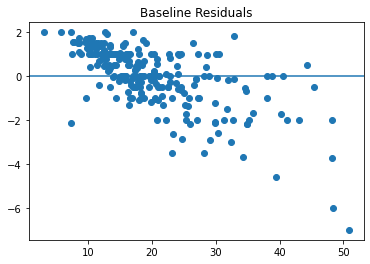

In [11]:
plt.scatter(x = 'total_bill', y = 'residual_baseline', data = tips)
plt.title('Baseline Residuals')
plt.axhline(y = 0)
plt.show()

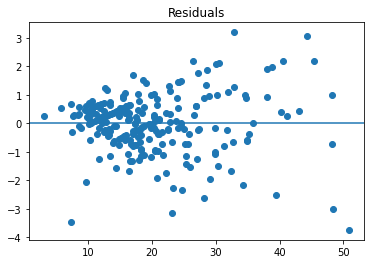

In [12]:
plt.scatter(x='total_bill', y='residual', data = tips)
plt.title('Residuals')
plt.axhline(y=0)
plt.show()

4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [13]:
#sum of squared errors
from sklearn.metrics import mean_squared_error

In [14]:
SSE = mean_squared_error(tips.tip, tips.yhat)*len(tips)
SSE_baseline = mean_squared_error(tips.tip, tips.yhat_baseline)*len(tips)

In [15]:
print(f'sum of squared errors is {SSE}')
print(f'sum of squared errors for baseline is or our total sum of squares is {SSE_baseline}')

sum of squared errors is 252.788743850776
sum of squared errors for baseline is or our total sum of squares is 465.2124770491804


In [16]:
#explained sum of squares

In [17]:
ESS = sum((tips.yhat - tips.tip.mean())**2)
ESS

212.4237331984042

In [18]:
print(f'explained sum of squares is {ESS}')

explained sum of squares is 212.4237331984042


In [19]:
#total sum of squares
TSS = ESS + SSE
print(f'total sum of squares is {TSS}')

total sum of squares is 465.21247704918017


In [20]:
#Our model is performing better than the baseline since it is a lower number/closer to zero.

In [21]:
#mean squared error
MSE = mean_squared_error(tips.tip, tips.yhat)
MSE_baseline = mean_squared_error(tips.tip, tips.yhat_baseline)

In [22]:
print(f'mean squared of error for our model is {MSE}')
print(f'mean squared of error for our baseline is {MSE_baseline}')

mean squared of error for our model is 1.036019442011377
mean squared of error for our baseline is 1.906608512496641


In [23]:
#our model is performing better than the baseline, it is a lower number/closer to zero.

In [24]:
#root mean squared of error

In [25]:
from math import sqrt

In [26]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

In [27]:
print(f'Root mean squared of error for our model is {RMSE}')
print(f'Root mean squared of error for our baseline is {RMSE_baseline}')

Root mean squared of error for our model is 1.0178504025697377
Root mean squared of error for our baseline is 1.3807999538298954


In [28]:
#our model is still better, it is a lower number.

5.) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount)

In [29]:
#sum of squares baseline
SSE_baseline = mean_squared_error(tips.tip, tips.yhat_baseline)*len(tips)
print(f'sum of squared errors for baseline is or our total sum of squares is {SSE_baseline}')

#mean squared error baseline
MSE_baseline = mean_squared_error(tips.tip, tips.yhat_baseline)
print(f'mean squared of error for our baseline is {MSE_baseline}')

#root mean squared error for baseline
RMSE_baseline = sqrt(MSE_baseline)
print(f'Root mean squared of error for our baseline is {RMSE_baseline}')

sum of squared errors for baseline is or our total sum of squares is 465.2124770491804
mean squared of error for our baseline is 1.906608512496641
Root mean squared of error for our baseline is 1.3807999538298954


6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [30]:
def SSE_compare(SSE, SSE_baseline):
    if SSE < SSE_baseline:
        return print('Our model performs better than the baseline')
        
    else:
        print('Our model is not better than the baseline')

In [31]:

SSE_compare(SSE, SSE_baseline)


Our model performs better than the baseline


7.) What is the amount of variance explained in your model?

In [32]:
#variance
R2 = ESS/TSS
R2

0.4566165863516763

In [69]:
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


In [70]:
#also variance
R2 = model.rsquared
R2

0.5867866723989039

In [71]:
#ALSO variance
evs = explained_variance_score(tips.tip, tips.yhat)
evs

0.4566165863516767

In [72]:
print(f'The amount of variance explained in our model is {round(R2,2)}')

The amount of variance explained in our model is 0.59


8.) Is your model significantly better than the baseline model?

In [73]:
f_pval = model.f_pvalue
print(f"our p-value for our model's significance is {f_pval}")

our p-value for our model's significance is 2.0389744555910457e-46


9.) Create a file named evaluate.py that contains the following functions.

In [74]:
#plot_residuals(y, yhat): creates a residual plot

def plot_residuals(y,yhat):
    residuals = y - yhat
    plt.scatter(y, residuals)
    plt.axhline(y=0, color='black')
    plt.show()

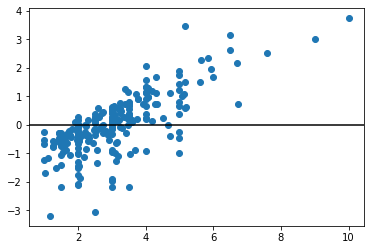

In [75]:
plot_residuals(tips.tip, tips.yhat)

In [76]:
def regression_errors(y, yhat):
    import sklearn.metrics
    import math
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    print(f' SSE is {SSE}')
    
    ESS = sum((yhat - y.mean())**2)
    print(f'ESS is {ESS}')
    
    TSS = ESS + SSE
    print(f'TSS is {TSS}')
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    print(f'MSE is {MSE}')
    
    RMSE = sqrt(sklearn.metrics.mean_squared_error(y,yhat))
    print(f'RMSE is {RMSE}')

In [77]:
regression_errors(tips.tip, tips.yhat)

 SSE is 252.78874385077597
ESS is 212.4237331984042
TSS is 465.21247704918017
MSE is 1.036019442011377
RMSE is 1.0178504025697377


In [78]:
def baseline_mean_errors(y):
    import sklearn.metrics
    import math
    baseline = y.mean()
    residuals = baseline - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    print(f'SSE baseline is {SSE}')
    
    MSE = SSE/len(y)
    print(f'MSE baseline is {MSE}')
    
    RMSE = sqrt(MSE)
    print(f'RMSE baseline {RMSE}')

In [79]:
baseline_mean_errors(tips.tip)

SSE baseline is 465.21247704918085
MSE baseline is 1.9066085124966428
RMSE baseline 1.3807999538298958


In [80]:
import sklearn.metrics
import math
def better_than_baseline(y,yhat):
    baseline = y.mean()
    residuals_baseline = baseline - y
    residuals_squared_baseline = sum(residuals_baseline**2)
    SSE_baseline = residuals_squared_baseline
    
    MSE_baseline = SSE_baseline/len(y)
    
    RMSE_baseline = sqrt(MSE_baseline)
    
    residuals = yhat - y
    residuals_squared = sum(residuals**2)
    SSE = residuals_squared
    
    MSE = sklearn.metrics.mean_squared_error(y,yhat)
    
    RMSE = sqrt(sklearn.metrics.mean_squared_error(y,yhat))
    
    if RMSE < RMSE_baseline:
        return True
    else: 
        return False

In [81]:
better_than_baseline(tips.tip,tips.yhat)

True

model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [84]:
def model_significance(ols_model):
    R2 = ols_model.rsquared
    f_pval = ols_model.f_pvalue
    print(f'variance explained in our model is {round(R2,2)}')
    if f_pval <.05:
        return print(f"our p-value for our model's significance is {f_pval}, so it is significantly better than the baseline")
    else:
        return print(f"our p-value for our model's significance is {f_pval}, so it is NOT significantly better than the baseline")

In [85]:
model_significance(model)

variance explained in our model is 0.59
our p-value for our model's significance is 2.0389744555910457e-46, so it is significantly better than the baseline


10.) Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [86]:
mpg_df = data('mpg')

In [87]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [88]:
x = mpg_df['displ']
y = mpg_df['hwy']

In [89]:
model = ols('hwy ~ displ', data=mpg_df).fit()
mpg_df['yhat'] = model.predict(x)

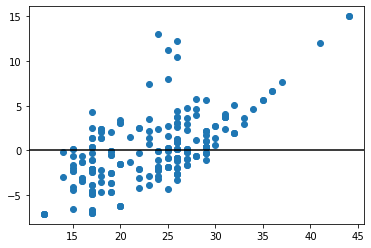

In [90]:
plot_residuals(y,mpg_df.yhat)

In [91]:
regression_errors(y,mpg_df.yhat)

 SSE is 3413.8290089954626
ESS is 4847.833384166935
TSS is 8261.662393162398
MSE is 14.589012858954987
RMSE is 3.8195566312014524


In [92]:
baseline_mean_errors(y)

SSE baseline is 8261.662393162384
MSE baseline is 35.30624954342899
RMSE baseline 5.941906221359353


In [93]:
better_than_baseline(y,mpg_df.yhat)

True

In [94]:
model_significance(model)

variance explained in our model is 0.59
our p-value for our model's significance is 2.0389744555910457e-46, so it is significantly better than the baseline


In [95]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,28.636473
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,28.636473
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,25.812002
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,25.812002
